Hukum Dulong-Petit (1819): untuk banyak padatan, kapasitas kalor diberikan oleh persamaan:
$$
C = 3k_{B}\,\text{per atom} \\
C = 3R
$$
dengan $R$ adalah konstanta gas ideal.

| Material | $C/R$ |
|----------|-------|
| Aluminium (Al) |  2.91 |
| Antimon (Sb) | 3.03 |
| Tembaga (Cu) | 2.94 |

Nilai eigen dari suatu osilator harmonik adalah:
$$
E_{n} = \hbar\omega\left( n + \frac{1}{2} \right)
$$

Fungsi partisi dapat dituliskan sebagai:
$$
\begin{align}
Z_{1D} & = \sum_{n \geq 0} \mathrm{e}^{-\beta E_{n}} \\
       & = \sum_{n \geq 0} \mathrm{e}^{-\beta \hbar\omega\left(n + \frac{1}{2}\right)}
\end{align}
$$

Nilai ekspektasi dari energi internal adalah:
$$
\begin{equation}
\langle E \rangle = -\frac{1}{Z_{1D}}\frac{\partial Z_{1D}}{\partial \beta}
= \hbar\omega\left( \frac{1}{\mathrm{e}^{\beta\hbar\omega}-1} + \frac{1}{2} \right)
\end{equation}
$$
Dengan menggunakan faktor okupansi Bose:
$$
\begin{equation}
n_{\mathrm{B}}(x) = \frac{1}{e^x - 1}
\end{equation}
$$
dapat juga dituliskan:
$$
\begin{equation}
\langle E \rangle = \hbar\omega\left( n_{\mathrm{B}}(\beta\hbar\omega) + \frac{1}{2}\right)
\end{equation}
$$

Kapasitas kalor untuk satu osilator harmonik adalah:
$$
\begin{equation}
C = \frac{\partial \langle E \rangle}{\partial T} =
k_{B}\left(\beta\hbar\omega\right)^2
\frac{e^{\beta\hbar\omega}}{\left(e^{\beta\hbar\omega} - 1\right)^2}
\end{equation}
$$

Untuk kasus 3D, kita memiliki nilai eigen osilator harmonik:
$$
\begin{equation}
E_{n_{x},n_{y},n_{z}} = \hbar\omega\left[ \left( n_{x} + \frac{1}{2} \right)
+ \left( n_{y} + \frac{1}{2} \right) + \left( n_{z} + \frac{1}{2} \right)
\right]
\end{equation}
$$

Untuk fungsi partisi
$$
Z_{3D} = \sum_{n_{x},n_{y},n_{z} \geq 0 }
\mathrm{e}^{-\beta E_{n_{x},n_{y},n_{z}}}
= (Z_{1D})^3
$$

Untuk nilai ekspektasi energi internal:
$$
\begin{equation}
\langle E_{3D} \rangle = 3 \langle E_{1D} \rangle
\end{equation}
$$

Untuk kapasitas kalor
$$
\begin{equation}
C = 3k_{B}\left(\beta\hbar\omega\right)^2
\frac{e^{\beta\hbar\omega}}{\left(e^{\beta\hbar\omega} - 1\right)^2}
\end{equation}
$$

Dengan menggunakan nilai-nilai berikut
$$
k_{B} = 1 \\
\omega = 1 \\
\hbar = 1
$$

In [23]:
from sympy import *
init_printing(use_latex=True)
kB = symbols("k_B", real=True, nonnegative=True)
β = symbols("beta", real=True, nonnegative=True)
ħ = symbols("hbar", real=True)
T = symbols("T", real=True, nonnegative=True)
ω = symbols("omega", real=True, nonnegative=True)

In [24]:
kB, β, ħ, T, ω

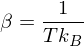

In [25]:
Equality(β,1/(kB*T))

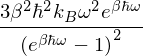

In [26]:
C = 3*kB*(β*ħ*ω)**2 * exp(β*ħ*ω)/(exp(β*ħ*ω) - 1)**2
C

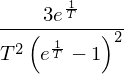

In [27]:
expr1 = C.subs([(ω,1), (kB,1), (ħ,1), (β,1/T) ] )
expr1

In [41]:
import numpy as np

Npoints = 100
T_array = np.linspace(1e-10,2,Npoints)
C_array = np.zeros(Npoints)

for i in range(Npoints):
    C_array[i] = expr1.evalf( subs={T : T_array[i]} )

In [49]:
import matplotlib.pyplot as plt
import matplotlib

In [69]:
matplotlib.rc("text", usetex=True)
# alternative:
# matplotlib.rcParams['text.usetex'] = True

In [71]:
?matplotlib.rc

In [72]:
matplotlib.rcParams.update({'font.size': 20})

In [54]:
matplotlib.style.available

['seaborn-notebook',
 'classic',
 'seaborn-deep',
 'seaborn-poster',
 '_classic_test',
 'Solarize_Light2',
 'ggplot',
 'seaborn-ticks',
 'fast',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-paper',
 'bmh',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'dark_background',
 'seaborn-colorblind',
 'grayscale',
 'tableau-colorblind10',
 'seaborn',
 'seaborn-darkgrid',
 'seaborn-white',
 'fivethirtyeight']

In [55]:
matplotlib.style.use("dark_background")

Text(0,0.5,'$C/{3k_B}$')

<Figure size 640x480 with 0 Axes>

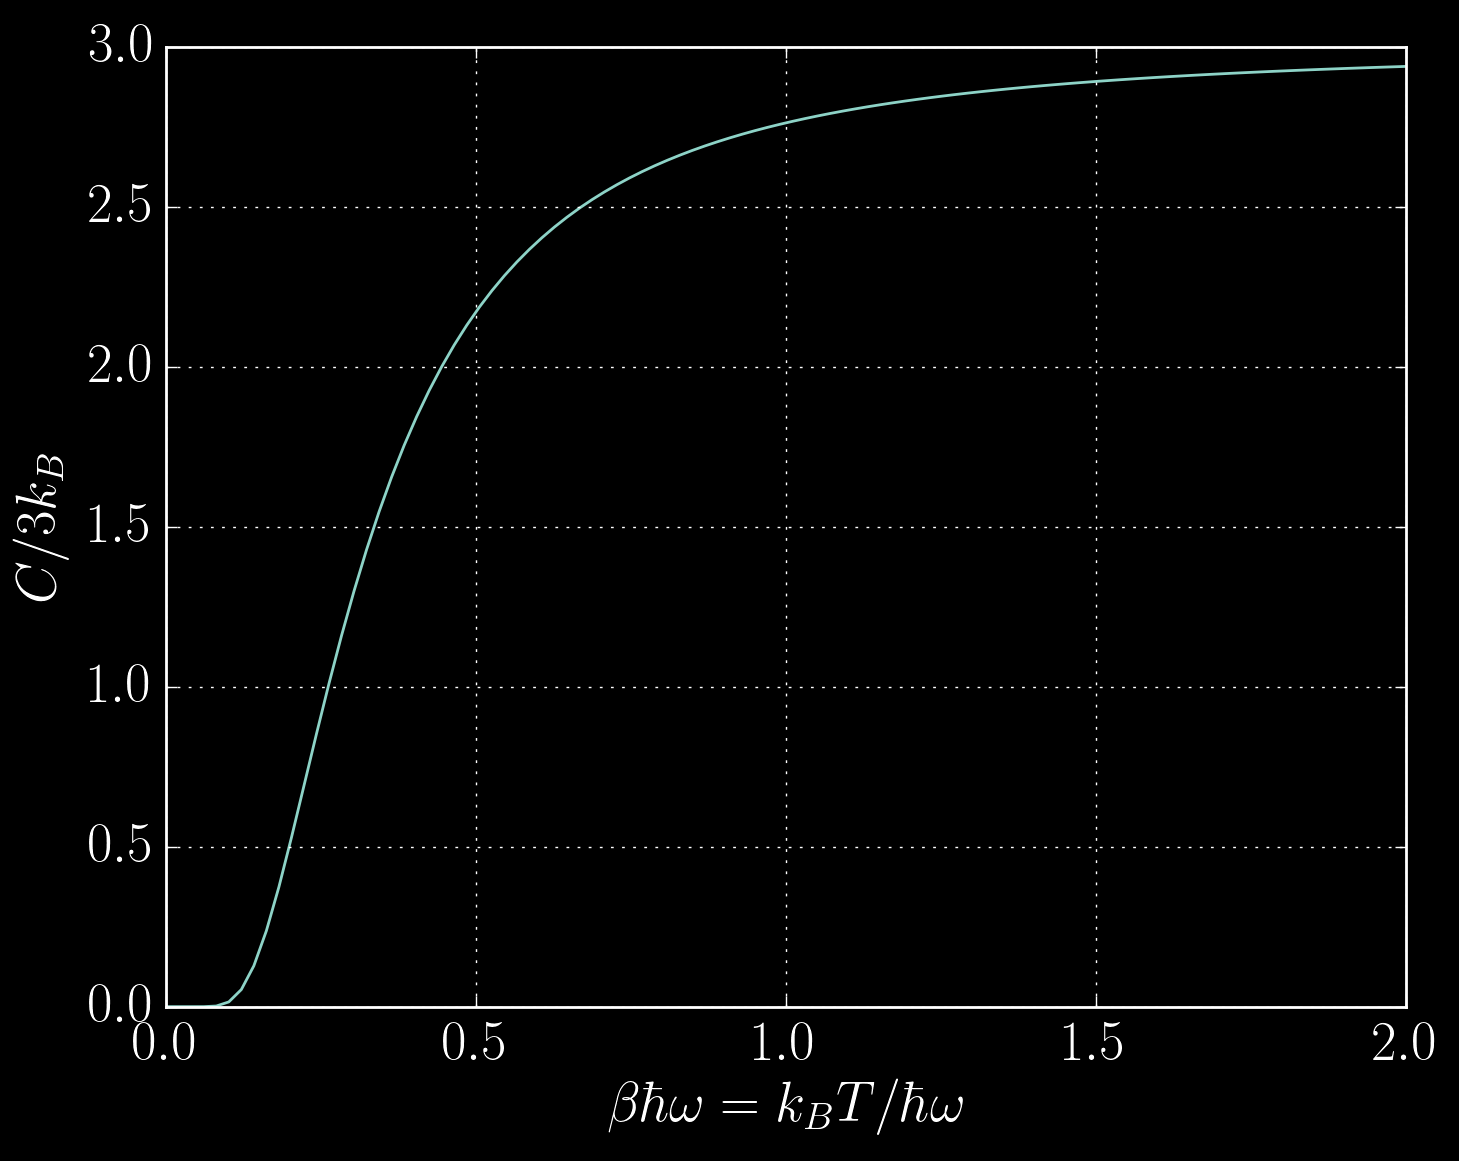

In [77]:
plt.clf()
plt.figure(dpi=200)
plt.plot(T_array, C_array)
plt.grid(True)
plt.xlabel(r"$\beta\hbar\omega = k_B T / \hbar\omega$")
plt.ylabel(r"$C/{3k_B}$")